## 11. 대중교통 데이터 시각화하기

In [ ]:
# 데이터 불러오기

import csv
f = open('subwayfee_old.csv')
data = csv.reader(f)

for row in data :
    print(row)

In [ ]:
# 유임 승차 데이터를 정수형으로 바꾸기

import csv
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)

for row in data :
    row[4] = int(row[4])
    print(row)

In [ ]:
# 유무임 승차하 데이터를 정수형으로 바꾸기

import csv
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    print(row)

In [ ]:
import csv
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    rate = row[4] / row[6]
    if rate > mx :
        mx = rate
print(mx)

# 오류 발생: 0으로 값을 나눴다는 오류 발생

In [ ]:
# row[6]이 0인 행 추출

import csv
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] == 0 :
        print(row)

In [ ]:
import csv
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] != 0 :    # 만약 row[6](무임 승차 인원) 값이 0이 아니라면
        rate = row[4] / row[6]
        if rate > mx :    # 만약 rate 값이 mx 값보다 크다면
            mx = rate     # mx 값을 rate 값이으로 업데이터 하기
            print(row, round(rate,2))    # 업데이트된 값을 출력하기

In [ ]:
import csv
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 and (row[4] + row[6]) >100000 :
        rate = row[4] / (row[4] + row[6])
        if rate > mx :
            mx = rate
            print(row, round(rate,2))

In [ ]:
import csv
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 and (row[4] + row[6]) >100000 :
        rate = row[4] / (row[4] + row[6])
        if rate > 0.94 :
            mx = rate
            print(row, round(rate,2))

In [2]:
# 유임 승차 비율이 가장 높은 역 찾기

import csv
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 and (row[4] + row[6]) >100000 :
        rate = row[4] / (row[4] + row[6])
        if rate > mx :
            mx = rate
            mx_station = row[3] + ' ' + row[1]

print(mx_station, round(mx * 100,2))

홍대입구 2호선 95.34


In [3]:
# 유무임 승하차 인원이 가장 많은 역 찾기

import csv
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)
mx = [0] * 4    # 숫자 0으로 초기화된 4개의 리스트 생성
mx_station = [''] * 4    # 빈 문자열('')로 초기화된 리스트 생성
label = ['유임승차','유임하차','무임승차','무임하차']
print(mx, mx_station)

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
        if row[i] > mx[i-4] :    #i가 4부터 시작하므로 초기값을 i-4로 설정한다.
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]
for i in range(4) :
    print(label[i] + ' : ' + mx_station[i], mx[i])

[0, 0, 0, 0] ['', '', '', '']
유임승차 : 강남 2호선 3153418
유임하차 : 강남 2호선 3210437
무임승차 : 종로3가 1호선 387062
무임하차 : 제기동 1호선 400607


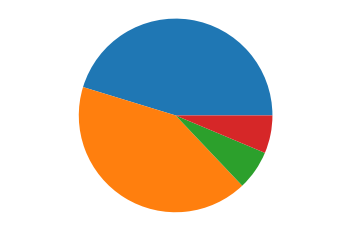

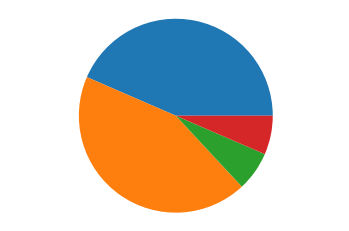

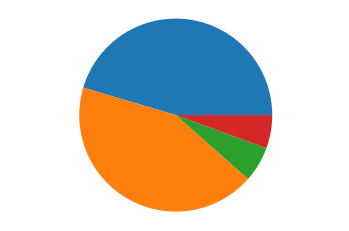

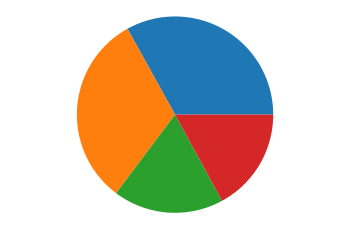

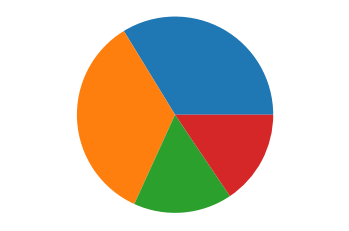

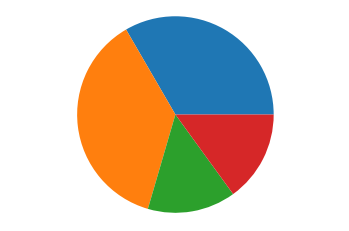

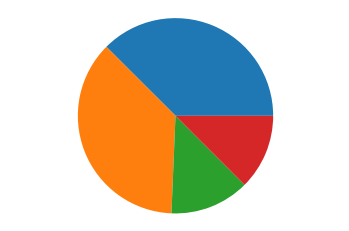

KeyboardInterrupt: 

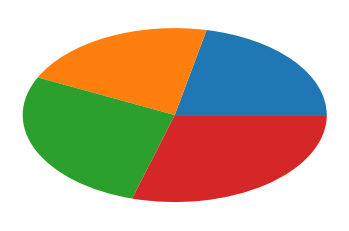

In [4]:
import csv
import matplotlib.pyplot as plt
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)
label = ['유임승차','유임하차','무임승차','무임하차']
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    #plt.figure(dpi = 300)
    plt.pie(row[4:8])
    plt.axis('equal')
    plt.show()
    
# 데이터가 너무 많아 중간에 멈춤

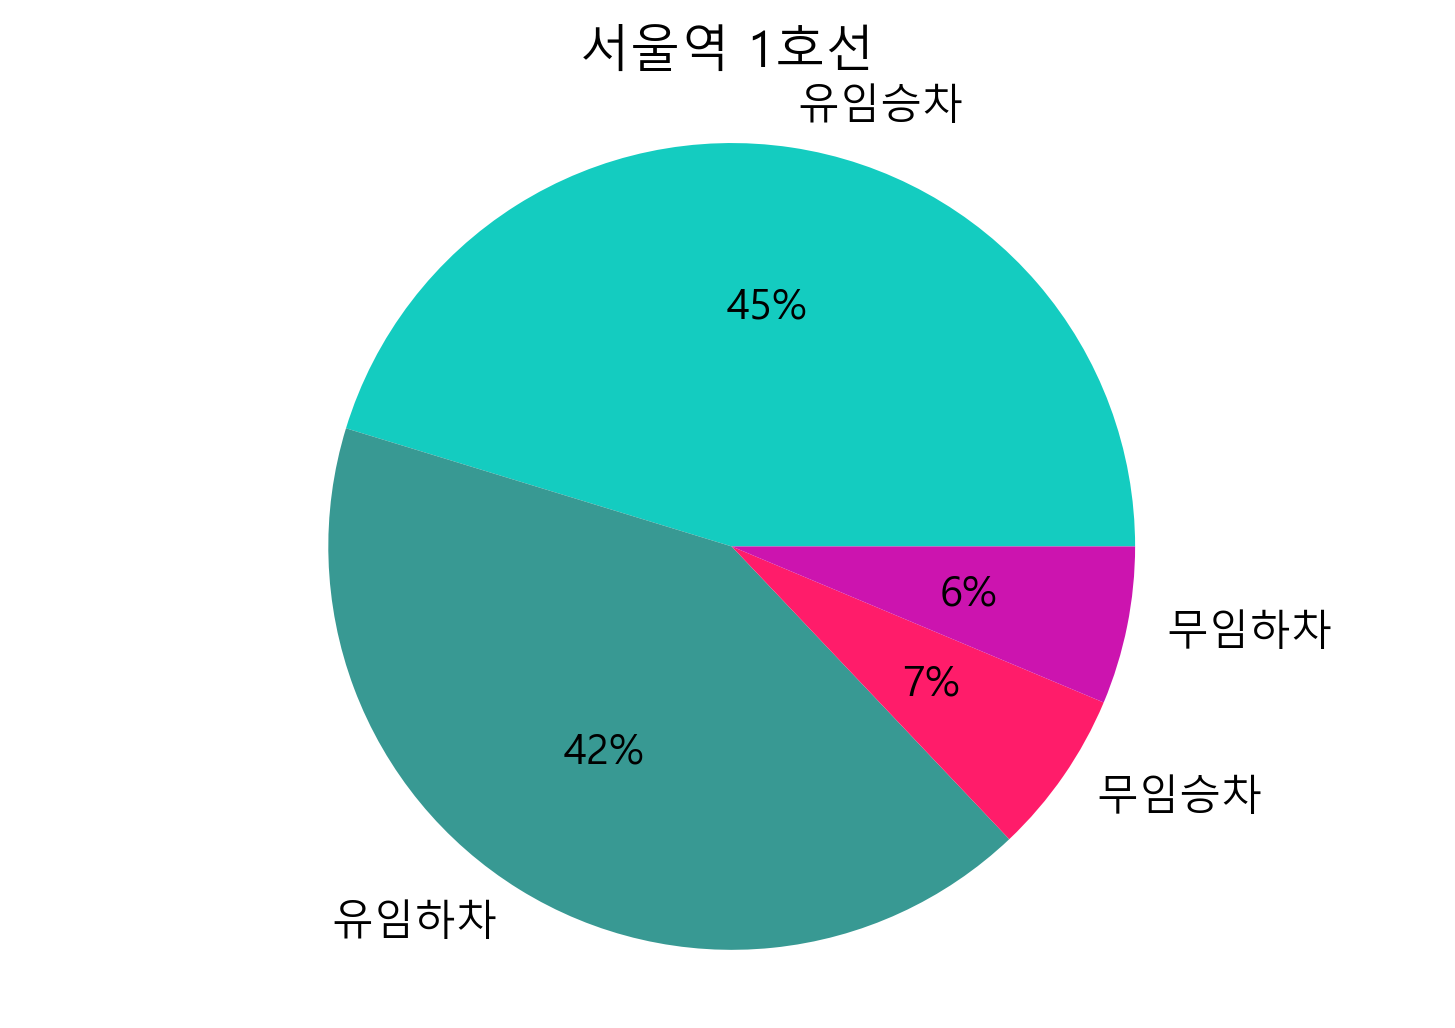

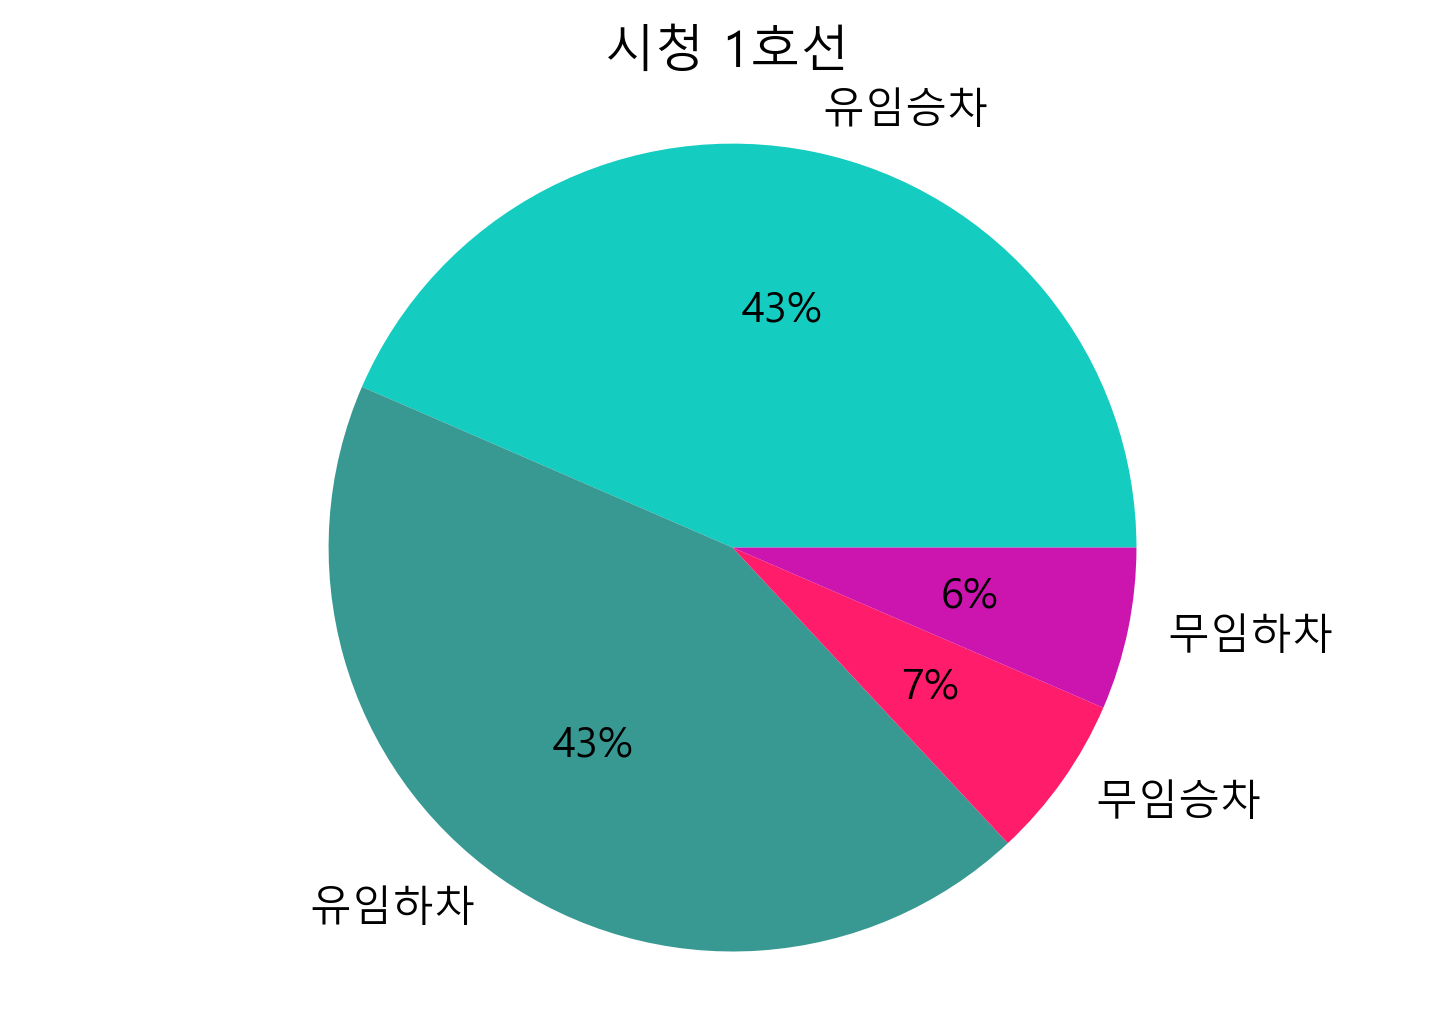

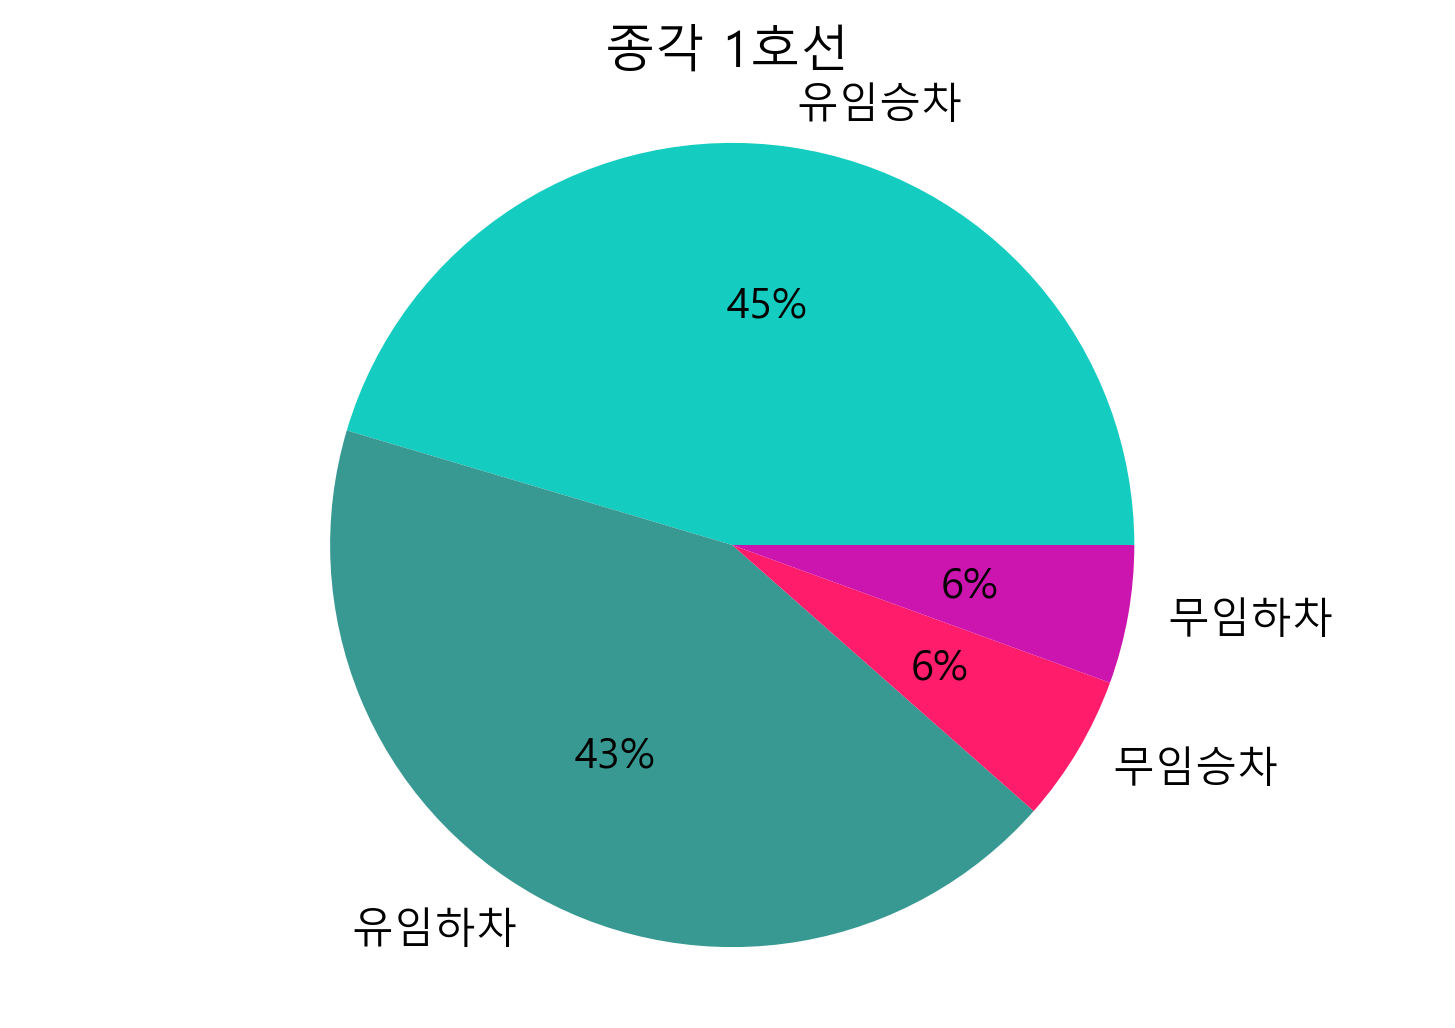

KeyboardInterrupt: 

In [5]:
# 모든 역의 유무임 승하차 비율을 파이 차트로 나타내기

import csv
import matplotlib.pyplot as plt
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)
label = ['유임승차','유임하차','무임승차','무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
plt.rc('font', family = 'Malgun Gothic')
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    plt.figure(dpi = 300)
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels = label, colors = c, autopct = '%1.f%%')
    plt.axis('equal')
    plt.show()
    
# 데이터가 너무 많아 중간에 멈춤

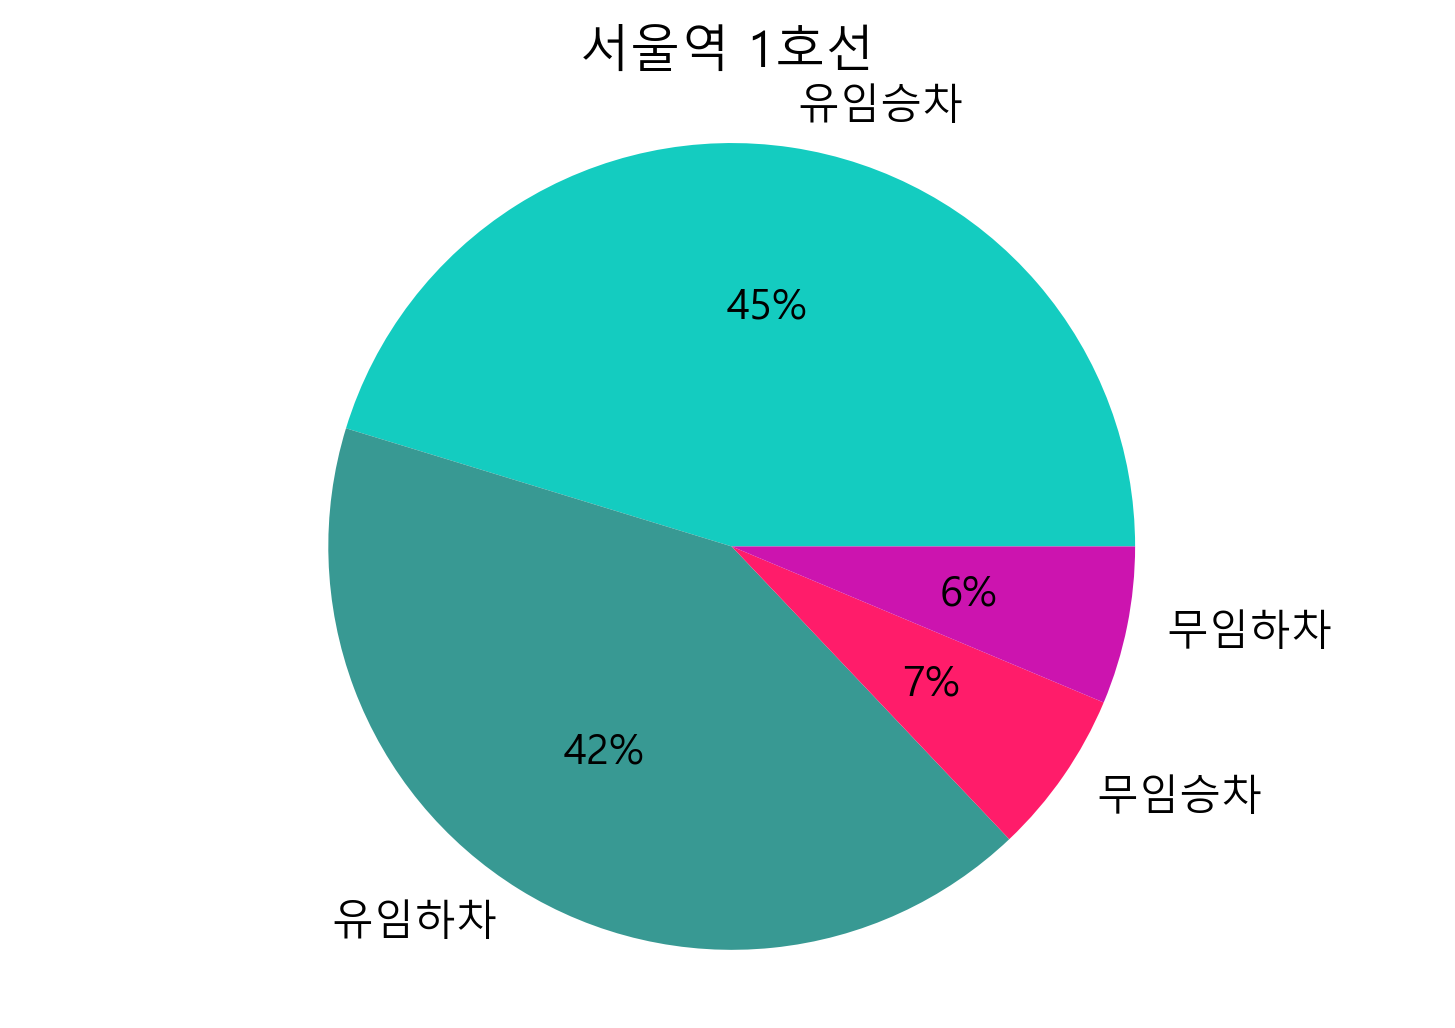

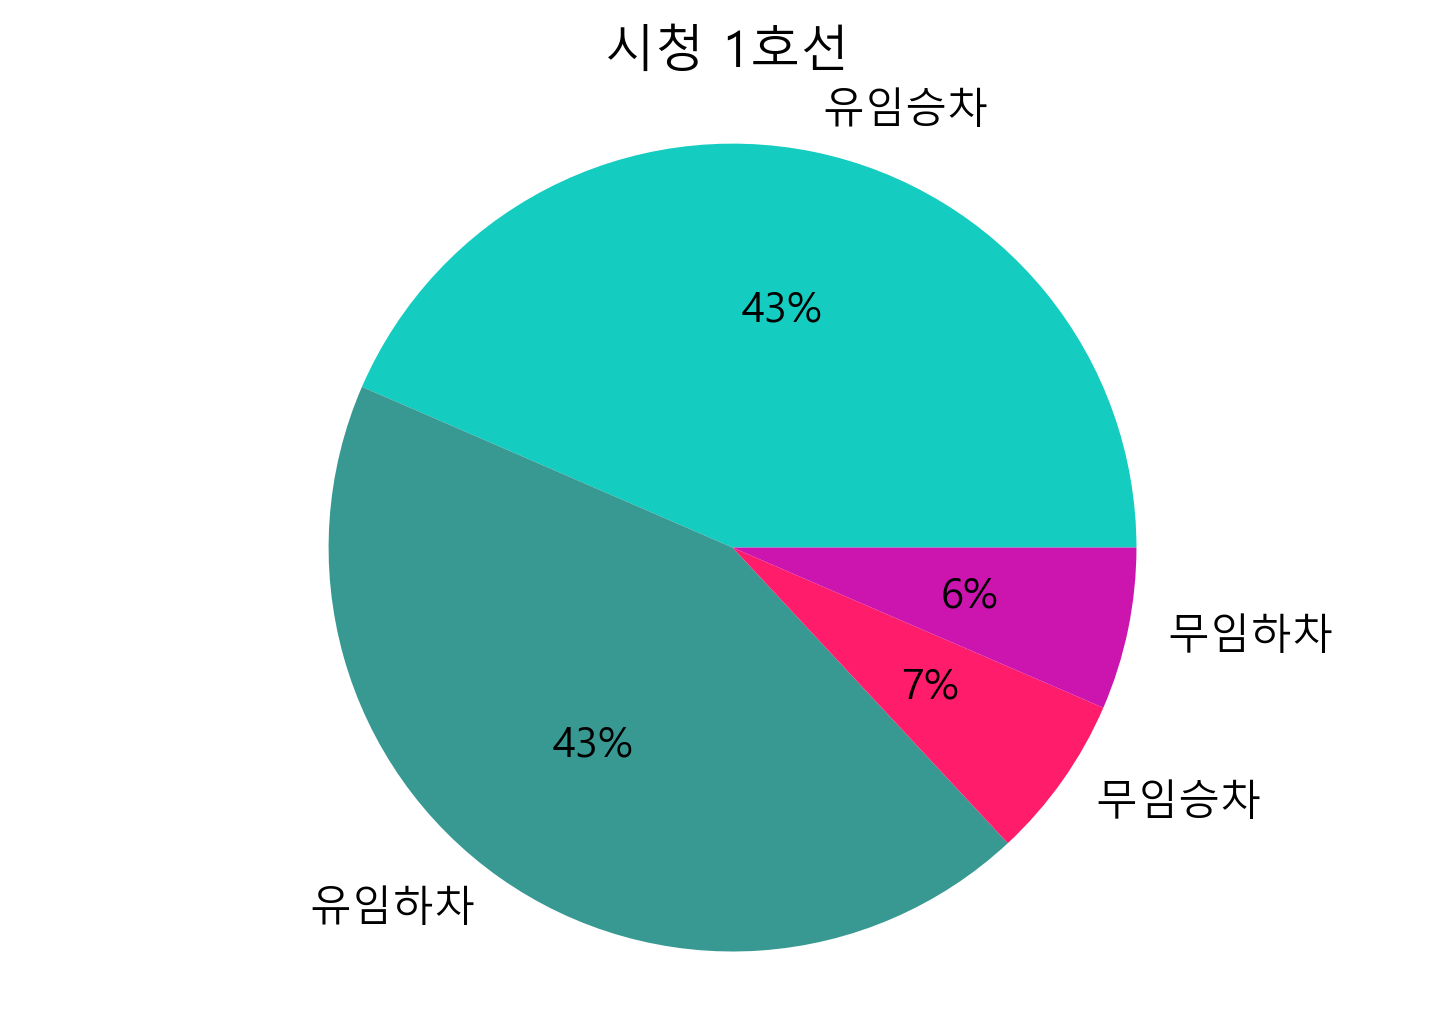

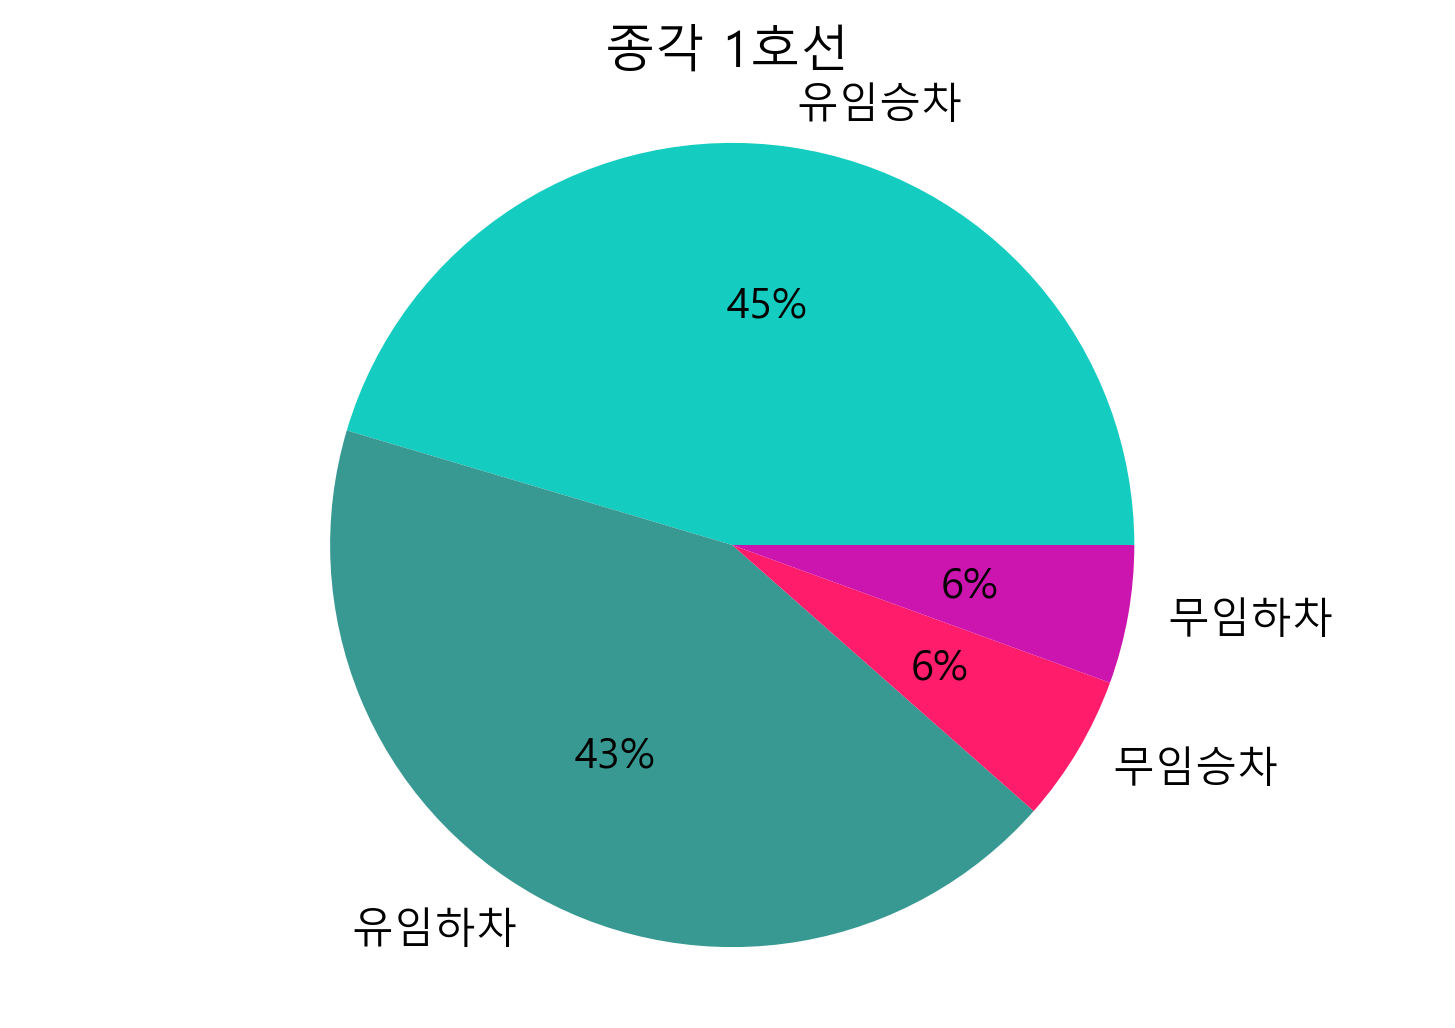

KeyboardInterrupt: 

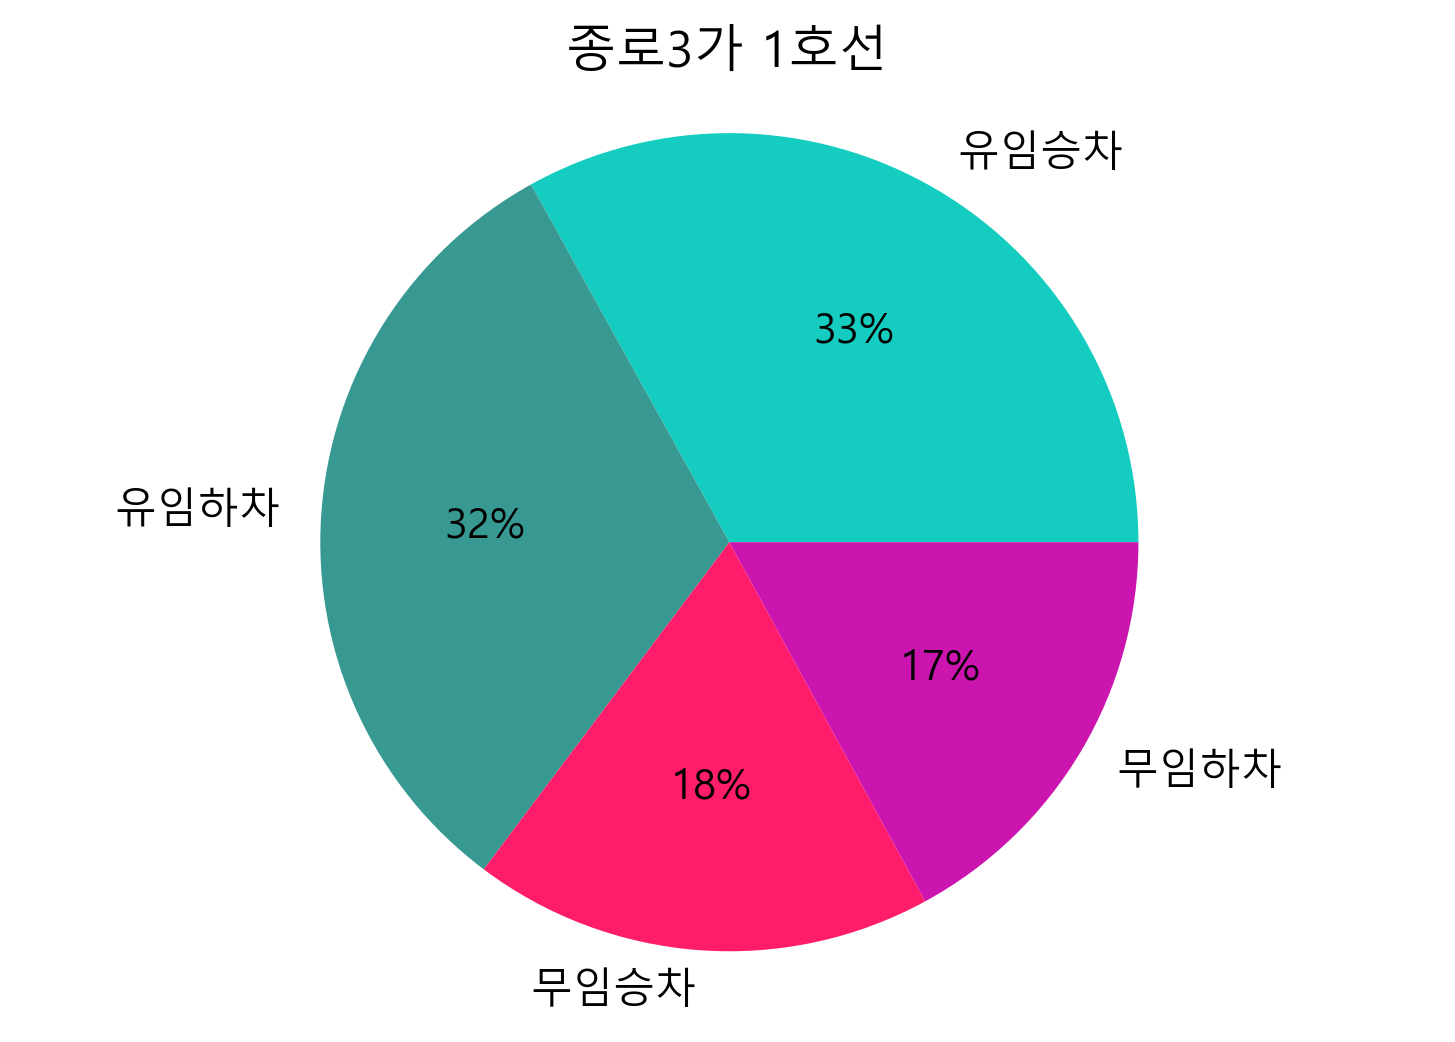

In [7]:
# 모든 역의 유무임 승하차 비율을 파이 차트로 나타내기(+ 이미지 저장)

import csv
import matplotlib.pyplot as plt
f = open('subwayfee_old.csv')
data = csv.reader(f)
next(data)
label = ['유임승차','유임하차','무임승차','무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
plt.rc('font', family = 'Malgun Gothic')
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    plt.figure(dpi = 300)
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels = label, colors = c, autopct = '%1.f%%')
    plt.axis('equal')
    plt.savefig(row[3] + ' ' + row[1] + '.png')
    plt.show()
    
# 데이터가 너무 많아 중간에 멈춤